README: 
- TODO: build vectorized model for multi-class classification

In [38]:
import pandas as pd
import os
os.chdir('/Users/liyuan/desktop/CSAir/codes')
import numpy as np
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB  
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from modeling_main import ReviewClassify
from tokenization import Tokenization
from help import get_tokenized_sent, get_stopwords

from prepare_data import PrepareData
from modeling import Modeling

import keras
from keras.utils import to_categorical
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns

In [39]:
# load data and split data
data_p = PrepareData()
data = data_p.load_data('../res/labeled_data_with_without_tk.csv')
train, test = data_p.split_data()

training data has 1038 examples
test data has 512 examples


In [12]:
# X_train, X_test is the vectorized tokens that represent each review
X_train, y_train, X_test, y_test = data_p.preprocess_data()

In [18]:
# get label dictionary
labels_index = data_p.get_labels_index()
labels_index

{'计划': 7,
 '机上': 5,
 '中转': 0,
 '售后': 3,
 '预订': 9,
 '设计': 8,
 '出发': 1,
 '性能': 4,
 '行程': 6,
 '到达': 2}

In [21]:
# class_priors = data_p.get_class_priors()
# class_size = data_p.get_class_size()

In [28]:
# convert encoded labels into one-hot encoding, using keras to_categorical functions
y_train_transformed = to_categorical(y_train, dtype='float32')
y_test_transformed = to_categorical(y_test, dtype='float32')

model = LogisticRegression()
multi_class_clf = OneVsRestClassifier(model, n_jobs=-1)
multi_class_clf.fit(X_train, y_train_transformed)
# each review has proba for 10 classes
scores = multi_class_clf.predict_proba(X_test)

In [35]:
# checking
print(scores.shape)
scores[0]

(512, 10)


array([0.09853178, 0.33434252, 0.13565876, 0.06441069, 0.05629614,
       0.14722415, 0.02828122, 0.03208602, 0.02670258, 0.06665792])

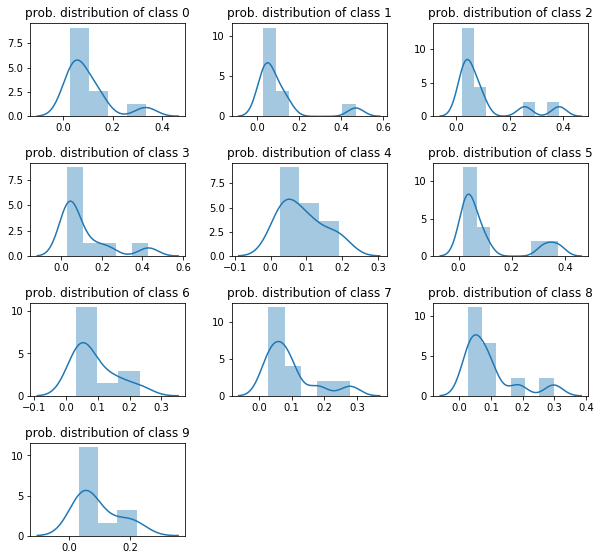

In [40]:
# distribution of probability of each review being classifies as class i (in test data)
plt.figure(figsize = (10,8))
# there are 10 classes in total
for i in range(len(scores[0])):
    plt.subplot(4, 3, i+1)
    plt.subplots_adjust(top = 0.99, bottom=0.1, hspace=0.5, wspace=0.3)
    prob_class = scores[:][i]
    sns.distplot(prob_class)
    plt.title('prob. distribution of class %d'%i)

In [69]:
def get_class_label_name(scores,idx):
    ''' input a review index, and get the predicted label 
    (the one with highest probability) for this review'''
    label_encoded = np.argmax(scores[idx])
    return [key for key in labels_index if labels_index[key] ==label_encoded ].pop()

predicted_labels = []
for i in range(len(scores)):
    label_pred = get_class_label_name(scores,i)
    predicted_labels.append(label_pred)

# add predicted labels to original test df
test['pred_label'] = predicted_labels
test

,review,review_tokens,label,label_encoded,pred_label
1520,行李箱丢了！在荷兰机场语言不通，你们航空公司也没个人来管事，解释！,行李箱 丢 荷兰 机场 语言不通 航空公司 管事 解释,到达,2,出发
1442,昨晚（11月11日）我搭乘cz8278次18:25长沙飞海口的航班，飞机下降临近海口时，我突...,昨晚 月 日 搭乘 cz 次 长沙 飞 海口 航班 飞机 下降 临近 海口 时 突发...,到达,2,机上
351,延误能不能早点通知，我就好修改航班，下午16点到机场，延误就早点通知，我就能修改18点的航班...,延误 早点 通知 修改 航班 下午 点到 机场 延误 早点 通知 修改 点 航班 延误 ...,中转,0,出发
352,严重晚点,晚点,中转,0,出发
578,我在网上补登里程、只能䃼登上9月24日南京-广州、国际段䃼登不上、麻烦处理一下。 zhu n...,网上 补登 里程 只能 䃼 登上 月 日 南京 广州 国际 段 䃼 登不上 麻烦 zh...,售后,3,售后
354,同航线航班均少量延误，南航后面飞哈尔滨的航班都飞了，就这个航班延误，感受非常糟糕。,航线 航班 少量 延误 南航 飞 哈尔滨 航班 飞 航班 延误 感受 糟糕,中转,0,中转
350,各种延误，各种理由，关键是在我这班之后的航班都飞了，还是飞的同一个目的地，你告诉我流量控制？...,延误 理由 关键 这班 航班 飞 飞 同一个 目的地 告诉 流量 控制 控制 太 不合理,中转,0,中转
240,大牌航空真正地需要改进服务意识和航延保障跟进措施，差评。从晚上七点到机场到凌晨三点飞机还冒到...,大牌 航空 改进 服务 意识 航延 保障 跟进 措施 差评 晚上 七点 机场 凌晨 三点 飞...,机上,5,机上
261,巴厘岛飞深圳晚上快三点了飞机机械故障，把乘客赶下飞机，不理不问，,巴厘岛 飞 深圳 晚上 三点 飞机 机械故障 乘客 飞机 不理,机上,5,机上
1536,于8月13号47H座位丢失电子书一个，不知道能否找回,月 号 H 座位 丢失 电子书 找回,到达,2,机上


In [76]:
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix

# get confusion matrix
def get_confusion_matrix(y_test,y_pred):
    '''get tp,tn,fp,fn for each class'''
    cm = ConfusionMatrix(y_test, y_pred)
    cm.print_stats()

y_test = test.label.values
y_pred = test.pred_label.values
get_confusion_matrix(y_test,y_pred)

Confusion Matrix:

Predicted  中转   出发  到达  售后  性能   机上  行程  计划  设计  预订  __all__
Actual                                                      
中转         24   19   1   1   0    8   0   0   0   1       54
出发          7   68  12   7   1   16   0   0   0   1      112
到达          2    8  21   0   0   16   0   0   0   0       47
售后          0   13   0  24   1    5   1   0   0   4       48
性能          0    8   0   4  15    9   2   0   0  17       55
机上          1   16   2   0   0   72   0   0   0   2       93
行程          0    6   0   2   0    2   5   0   0   3       18
计划          0    0   0   0   1    2   0   0   0   4        7
设计          0    1   0   0   4    2   0   0   1   4       12
预订          0    6   1   3   3    5   0   0   0  48       66
__all__    34  145  37  41  25  137   8   0   1  84      512


Overall Statistics:

Accuracy: 0.54296875
95% CI: (0.49870046846820293, 0.5867382423122843)
No Information Rate: ToDo
P-Value [Acc > NIR]: 7.479843526496029e-35
Kappa: 0.4567639257294429

training data has 1038 examples
test data has 512 examples
there are 10 classes
there are only 330 user reviews picked by classes after manual setting threshold
indices with multiple labels: [9, 25, 30, 34, 38, 51, 55, 61, 90, 98, 126, 144, 146, 161, 169, 176, 182, 216, 232, 259, 269, 290, 293, 384, 386, 398, 399, 403, 406, 417, 420, 426, 432, 433, 17, 28, 54, 103, 141, 199, 212, 228, 297, 305, 322, 344, 369, 391, 392, 393, 400, 422, 465, 1, 413, 111, 225, 327, 363, 444, 74, 100, 220, 238, 241, 275, 336, 342, 378, 409, 454]


,index,review,review_tokens,label,label_encoded,labels_predicted
0,0,行李箱丢了！在荷兰机场语言不通，你们航空公司也没个人来管事，解释！,行李箱 丢 荷兰 机场 语言不通 航空公司 管事 解释,到达,2,[1]
1,1,昨晚（11月11日）我搭乘cz8278次18:25长沙飞海口的航班，飞机下降临近海口时，我突...,昨晚 月 日 搭乘 cz 次 长沙 飞 海口 航班 飞机 下降 临近 海口 时 突发...,到达,2,"[2, 5]"
2,2,延误能不能早点通知，我就好修改航班，下午16点到机场，延误就早点通知，我就能修改18点的航班...,延误 早点 通知 修改 航班 下午 点到 机场 延误 早点 通知 修改 点 航班 延误 ...,中转,0,[1]
3,3,严重晚点,晚点,中转,0,[1]
4,4,我在网上补登里程、只能䃼登上9月24日南京-广州、国际段䃼登不上、麻烦处理一下。 zhu n...,网上 补登 里程 只能 䃼 登上 月 日 南京 广州 国际 段 䃼 登不上 麻烦 zh...,售后,3,[3]


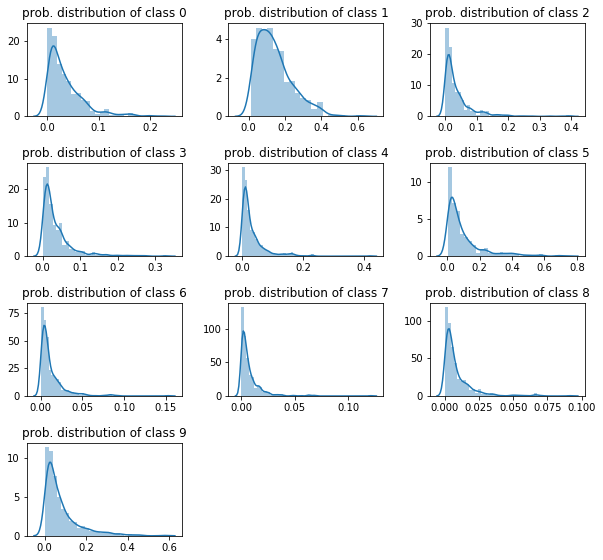

In [3]:
# logistic regression
# get_modeling_result(LogisticRegression(),'../res/labeled_data_with_without_tk.csv','../res/reviews_with_multiple_labels_lg.csv', '../res/reviews_with_no_labels_lg.csv')

# Naive Bayes
joined_test_data  = get_modeling_result(MultinomialNB(),'../res/labeled_data_with_without_tk.csv','../res/reviews_with_multiple_labels_NB.csv', '../res/reviews_with_no_labels_NB.csv')
joined_test_data.head()